In [1]:
import os
import sys
import psycopg2
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from sqlalchemy import create_engine
!{sys.executable} -m pip install psycopg2
from config import user_name, password, host, port, database_name

# Getting all data with 'Pandas' (optional for understanding)
data_dir = 'data/'
data_files = os.listdir(data_dir)
print(data_files[0][:-4])

data = {}
for file in data_files:
    data[file[:-4]] = pd.read_csv(data_dir + file)

departments


In [2]:
connection = psycopg2.connect(user = user_name,
                              password = password,
                              host = host,
                              port = port,
                              database = database_name)

cursor = connection.cursor()
emp_select_query = "select * from employees"
cursor.execute(emp_select_query)
emp_records = cursor.fetchall()

print("Total number of rows in 'Employees Table' is: ", cursor.rowcount)

employees_df = pd.DataFrame(emp_records)

print('Shape of "Employees Table"', employees_df.shape)

connection.commit()

salaries_select_query = "select * from salaries"
cursor.execute(salaries_select_query)
sal_records = cursor.fetchall()

print("Total number of rows in 'Salaries Table' is: ", cursor.rowcount)

salaries_df = pd.DataFrame(sal_records)

print('Shape of "Salaries Table"', salaries_df.shape)

comb_df = pd.merge(employees_df, salaries_df, left_on = 0, right_on = 0)

Total number of rows in 'Employees Table' is:  300024
Shape of "Employees Table" (300024, 7)
Total number of rows in 'Salaries Table' is:  300024
Shape of "Salaries Table" (300024, 2)


Date: 09-02-2021
Time: 00:05:20


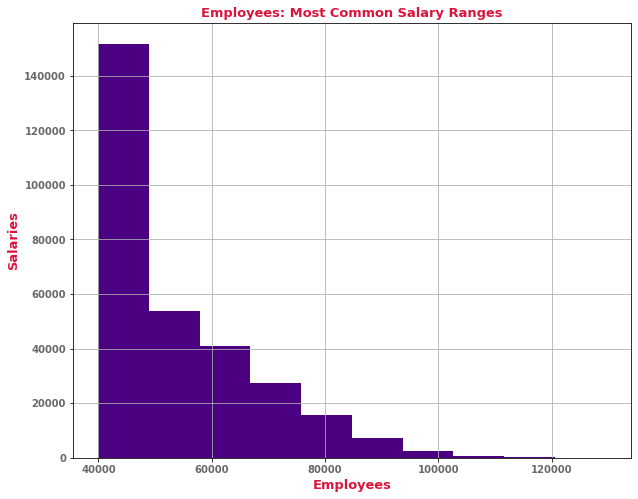

Note: This histogram shows the relationship between employees and the most common salaries (of employees).


In [3]:
plt.figure(figsize = [10, 8])

salaries_df[1].hist(color = "indigo")

plt.xlabel('Employees', size = 13, fontweight = 'bold', c = 'crimson')
plt.ylabel('Salaries', size = 13, fontweight = 'bold', c = 'crimson')
plt.title('Employees: Most Common Salary Ranges', size = 13, fontweight = 'bold', c = 'crimson')
plt.xticks(fontsize = 10, rotation = 'horizontal', fontweight = 'bold', c = 'dimgray')
plt.yticks(fontsize = 10, rotation = 'horizontal', fontweight = 'bold', c = 'dimgray')
plt.grid(True)

# Method # 1 of displaying 'date' and 'time'
print(f'Date:', datetime.now().strftime("%d-%m-%Y\nTime: %H:%M:%S"))

plt.show()

print('Note: This histogram shows the relationship between employees and the most common salaries (of employees).')

Date: 09-02-2021
Time: 00:05:23


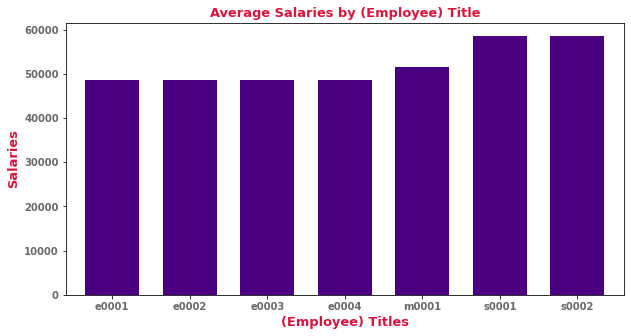

Note: This bar chart shows the relationship between employees (by their respective title) and
      average salaries of employees (by their respective titles).


In [4]:
plt.figure(figsize = (10, 5))


salaries_df_gb_mean = comb_df.groupby('1_x')['1_y'].mean()
graph = salaries_df_gb_mean.plot.bar(x = 0, y = 1, width = 0.7, color = "indigo")

plt.xlabel('(Employee) Titles', size = 13, fontweight = 'bold', c = 'crimson')
plt.ylabel('Salaries', size = 13, fontweight = 'bold', c = 'crimson')
plt.title('Average Salaries by (Employee) Title', size = 13, fontweight = 'bold', c = 'crimson')
plt.xticks(fontsize = 10, rotation = 'horizontal', fontweight = 'bold', c = 'dimgray')
plt.yticks(fontsize = 10, rotation = 'horizontal', fontweight = 'bold', c = 'dimgray')

# Method # 2 of displaying 'date' and 'time'
now = datetime.now()
print(f'Date:', now.strftime("%d-%m-%Y\nTime: %H:%M:%S"))

plt.show()

print('Note: This bar chart shows the relationship between employees (by their respective title) and\n      average salaries of employees (by their respective titles).')